In [ ]:
!mkdir -p ~/.kaggle # These commands helps you download datasets from kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:07<00:00, 60.2MB/s]
100% 1.06G/1.06G [00:07<00:00, 146MB/s] 


In [ ]:
# This code will help in unzipping the kaggle file that we have downloaded since it is zipped. And with this we were able to get
# our test and train folder

import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Creating a CNN (Convolutional neural network) model and training it on the train data.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten # These all are the layers that we would be needing. 

In [ ]:
# So now what we got to do is that we need to go to the train folder, we need to take all the images and give to our model.
# For that we can write custom code using OS Module. We need to take all the files, their lables and all that data will be sent to 
CNN model but the problem that will crop up would be that it is difficult to process all the data in one go bcz RAM is not sufficient.
 
To fix this ram issue, there is a concept called "generators "in keras.

In generators, instead of working on the whole model in one go, we divide the data into small batches and then that small batch is
used and after it's work is done, the second batch is used.

# Here, we will make two generators.. one for training data and one for validation of data



In [ ]:
# generators: 

train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = "inferred",
    label_mode =  "int", # this will make sure that cats are assigned 0 and dogs are assigned 1
    batch_size = 32,
    image_size = (256, 256) # This will reshape all the images to 256 by 256 by 3. The CNN model expects the size of all the images to
# to be same.
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = "inferred",
    label_mode =  "int",
    batch_size = 32,
    image_size = (256, 256) 
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
|#Now the problem is that all these values have been in stored in numpy array format and the problem with that is value of each numpy
array value ranges from 0 to 255 pixels and we have to change it to 0 to 1 or we can say that we need to normalise it.

In [ ]:
# Normalize

# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32) # We are dividing image by 255 pixels and returning image and label
    return image,label

train_ds = train_ds.map(process) # using the map function, what it will do it that it will take out an image and a lable from 
# train_ds and will send them in the process function and the function will return them after transforming into 0 or 1 pixels and then we will
# store them in train and validation 
validation_ds = validation_ds.map(process)

In [ ]:
 # Creating CNN model : In this there will be 3 Convolutional layers.
#  1st layer : 32 filters
#  2nd layer : 64 filters
#  3rd layer : 128 filters

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = "valid", activation = "relu", input_shape = (256, 256, 3))) # Ist Conv. layer
# After this will put cooling layer || # 32 in Conv2D is filters || kernel_size means filter_size, activation is mostly kept as relu
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = "valid"))

model.add(Conv2D(64, kernel_size = (3, 3), padding = "valid", activation = "relu")) # We will delete the input_shape as it will infer 
# it automatically
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = "valid"))

model.add(Conv2D(128, kernel_size = (3, 3), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = "valid"))

model.add(Flatten())

# here we are connecting 3 fully connected laters
model.add(Dense(128, activation = "relu")) # Dense layer with 128 neurons 
model.add(Dense(64, activation = "relu"))
model.add(Dense(1, activation = "sigmoid")) # Since it's activation, so we will change the output to 1 and activation to sigmoid



# This is our model

In [ ]:
# This is how you see if the model  is in the right shape or not.

model.summary()

# params = parameters 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"]) # loss is b.c bcz it's a binary classification problem.

In [ ]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

# since the batch size was 32 we have 625 baches (32 * 625 = 20000), meaning eachtime we will train 32 images so that it doesn't give
# to much load on the server

Epoch 1/10
625/625 [==============================] - 72s 92ms/step - loss: 0.5928 - accuracy: 0.6758 - val_loss: 0.5261 - val_accuracy: 0.7402
Epoch 2/10
625/625 [==============================] - 52s 82ms/step - loss: 0.4837 - accuracy: 0.7638 - val_loss: 0.4862 - val_accuracy: 0.7682
Epoch 3/10
625/625 [==============================] - 55s 87ms/step - loss: 0.3894 - accuracy: 0.8222 - val_loss: 0.4878 - val_accuracy: 0.7990
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.2760 - accuracy: 0.8804 - val_loss: 0.6570 - val_accuracy: 0.7864
Epoch 5/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1592 - accuracy: 0.9381 - val_loss: 0.9248 - val_accuracy: 0.7846
Epoch 6/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0925 - accuracy: 0.9650 - val_loss: 1.0632 - val_accuracy: 0.7870
Epoch 7/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0694 - accuracy: 0.9757 - val_loss: 1.2904 - val_accuracy:

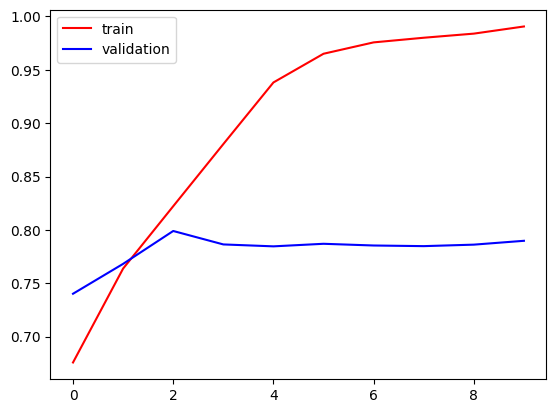

In [ ]:
# Here we are plotting a graph of training accuracy and validation accuracy.

import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color = "red", label = "train")
plt.plot(history.history["val_accuracy"], color = "blue", label = "validation")
plt.legend()
plt.show()


# It is clear from the graph that as epoch is increasing, the training accuracy is imporving as well but that is not the case of 
# validation accuracy and it is fluctuating b/w 75% - 80% and there is a big gap b/w them and this gap tells us that this a case of 
# over fitting

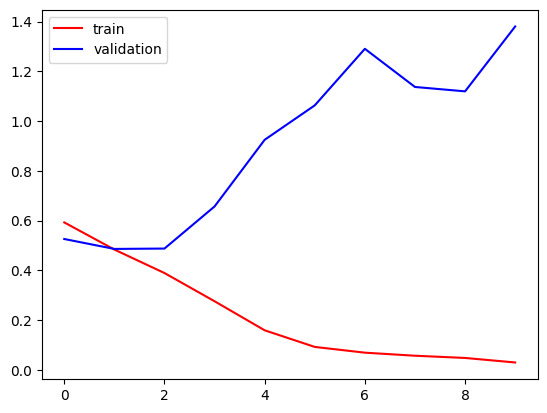

In [ ]:
# Here, we can see that as epoch is increaing, the training loss is reducing which is a good thing but in case of validation loss, it 
# increasing whic is not good and it is a clear sign of over-fitting.



plt.plot(history.history["loss"], color = "red", label = "train")
plt.plot(history.history["val_loss"], color = "blue", label = "validation")
plt.legend()
plt.show()

In [ ]:
# This means that the model is giving good results on training data and not on test data. Something must be done to fix
# this.

# Following are the way to reduce overfitting.

Add more data to the model
Data augmentation : Here we create more data by using our current data.
L1/L2 Regularization :  We can apply this.
Dropout layer: :  We can apply this.
Batch Normalization : :  We can apply this.
Reduce complexity :  We can apply this.

In [ ]:
# Here we will try to reduce over fitting by using drop layer nad batch Normalization.

In [ ]:
from keras.layers import BatchNormalization, Dropout

In [ ]:
 # Creating CNN model : In this there will be 3 Convolutional layers.
#  1st layer : 32 filters
#  2nd layer : 64 filters
#  3rd layer : 128 filters

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = "valid", activation = "relu", input_shape = (256, 256, 3))) # Ist Conv. layer
# After this will put cooling layer || # 32 in Conv2D is filters || kernel_size means filter_size, activation is mostly kept as relu
model.add(BatchNormalization()) # That is how you add modules
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = "valid"))

model.add(Conv2D(64, kernel_size = (3, 3), padding = "valid", activation = "relu")) # We will delete the input_shape as it will infer 
# it automatically
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = "valid"))

model.add(Conv2D(128, kernel_size = (3, 3), padding = "valid", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = "valid"))

model.add(Flatten())

# here we are connecting 3 fully connected laters
model.add(Dense(128, activation = "relu")) # Dense layer with 128 neurons 
model.add(Dropout(0.1)) 
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.1)) 
model.add(Dense(1, activation = "sigmoid")) # Since it's activation, so we will change the output to 1 and activation to sigmoid



# This is our model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"]) 

In [ ]:
# Again running model after using drop layer nad batch Normalization.

history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 67s 102ms/step - loss: 1.1717 - accuracy: 0.6079 - val_loss: 0.6062 - val_accuracy: 0.6772
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5556 - accuracy: 0.7172 - val_loss: 0.5166 - val_accuracy: 0.7424
Epoch 3/10
625/625 [==============================] - 64s 103ms/step - loss: 0.4678 - accuracy: 0.7818 - val_loss: 0.5259 - val_accuracy: 0.7194
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3993 - accuracy: 0.8210 - val_loss: 0.4545 - val_accuracy: 0.7784
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3263 - accuracy: 0.8569 - val_loss: 0.4540 - val_accuracy: 0.8006
Epoch 6/10
625/625 [==============================] - 64s 101ms/step - loss: 0.2512 - accuracy: 0.8972 - val_loss: 0.4284 - val_accuracy: 0.8256
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1741 - accuracy: 0.9306 - val_loss: 0.6843 - val_ac

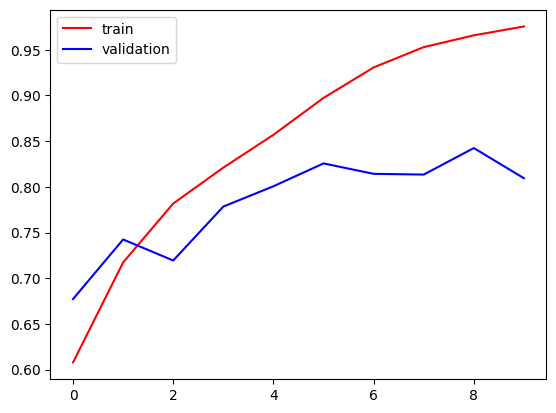

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color = "red", label = "train")
plt.plot(history.history["val_accuracy"], color = "blue", label = "validation")
plt.legend()
plt.show()


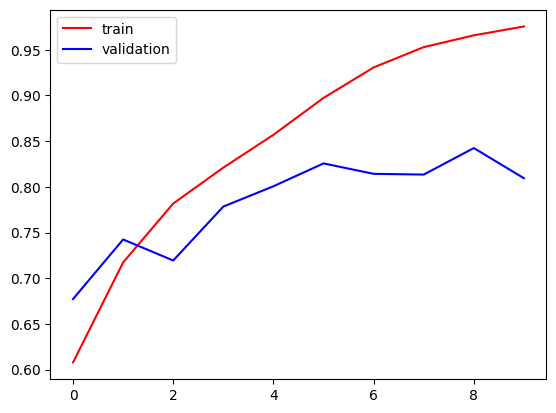

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color = "red", label = "train")
plt.plot(history.history["val_accuracy"], color = "blue", label = "validation")
plt.legend()
plt.show()


In [ ]:
import cv2 # Importing open CV

In [ ]:
test_img = cv2.imread("/content/Dog.jpg") # calling cv2 function || test_img has an numpy array inside

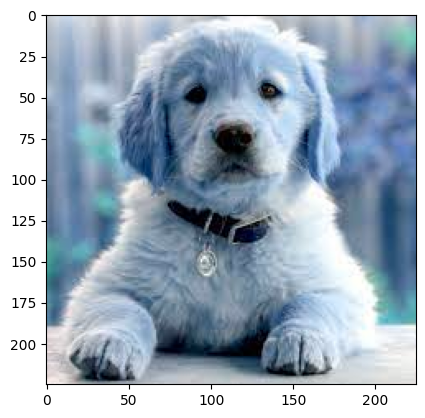

In [ ]:
plt.imshow(test_img) # using matplotlib   


In [ ]:
test_img.shape # The shape of the image is way too large, we need to resize it to (256, 256, 3)

(225, 225, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256)) # calling cv2.resize function and changing the shape of the image to (256, 256)

In [ ]:
test_input = test_img.reshape((1, 256, 256, 3)) # the 1 signifies that since there is only one image and that has this dimension
# (1, 256, 256, 3) 

In [ ]:
model.predict(test_input)

# The output of 1 signifies that it is a dog

1/1 [==============================] - 0s 257ms/step


array([[1.]], dtype=float32)

In [ ]:
test_img = cv2.imread("/content/cat1.jpg")

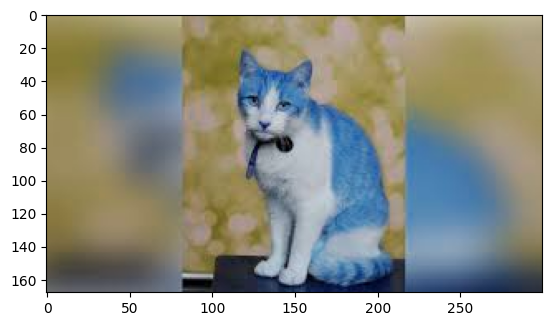

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(168, 300, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))

In [ ]:
test_input = test_img.reshape((1, 256, 256, 3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)